In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
dataset = pd.merge(ride_data, city_data)

# Display the data table for preview
dataset.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

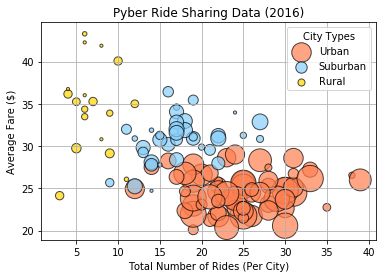

<Figure size 432x288 with 0 Axes>

In [47]:
# Obtain the x and y coordinates for each of the three city types
city_types = dataset.loc[:, ['city','type']].drop_duplicates()
city_ride_count = dataset.loc[:, ['city','type']].groupby('city').count()
city_avg_fare = dataset.loc[:, ['city','fare']].groupby('city').mean().drop_duplicates()
city_driver_count = dataset.loc[:, ['city','driver_count']].drop_duplicates()

# Summary table
city_table = pd.merge(city_driver_count, city_avg_fare, how='inner', on='city')
city_table = pd.merge(city_table, city_ride_count, how='inner', on='city')
city_table = pd.merge(city_table, city_types, how='inner', on='city')
city_table = city_table.rename(columns={
    'city':'City',
    'driver_count':'Driver Count',
    'fare':'Average Fare',
    'type_x':'Ride Count',
    'type_y':'Type',
})

# City Types Table
urban_cities = city_table.loc[city_table['Type'] == 'Urban', :]
suburban_cities = city_table.loc[city_table['Type'] == 'Suburban', :]
rural_cities = city_table.loc[city_table['Type'] == 'Rural', :]

# Build the scatter plots for each city types
plt.scatter(urban_cities['Ride Count'], urban_cities['Average Fare'], 
            marker='o', c='coral', edgecolors='black', s=urban_cities['Driver Count'] * 10, alpha=0.7, label='Urban')
plt.scatter(suburban_cities['Ride Count'], suburban_cities['Average Fare'], 
            marker='o', c='lightskyblue', edgecolors='black', s=suburban_cities['Driver Count'] * 10, alpha=0.7, label='Suburban')
plt.scatter(rural_cities['Ride Count'], rural_cities['Average Fare'], 
            marker='o', c='gold', edgecolors='black', s=rural_cities['Driver Count'] * 10, alpha=0.7, label='Rural')


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
plt.legend(title='City Types', loc='upper right')

# Incorporate a text label regarding circle size

# Save Figure
plt.show()
plt.savefig("pyber_ride_sharing_data_2016.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

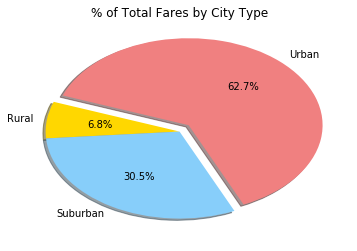

<Figure size 432x288 with 0 Axes>

In [48]:
# Calculate Type Percents
type_fare_sum = dataset.loc[:,['type','fare']].groupby('type').sum()

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0,0,0.1]
plt.pie(type_fare_sum, labels=type_fare_sum.index, colors=colors, shadow=True, startangle=160, autopct="%1.1f%%",
       explode=explode)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.show()
plt.savefig("total_fares_by_city_type.png")

## Total Rides by City Type

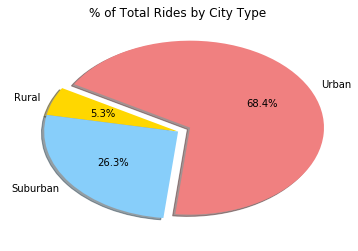

<Figure size 432x288 with 0 Axes>

In [49]:
# Calculate Ride Percents
type_ride_sum = dataset.loc[:,['type','fare']].groupby('type').count()

# Build Pie Chart
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0,0,0.1]
plt.pie(type_ride_sum, labels=type_ride_sum.index, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%",
       explode=explode)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.show()
plt.savefig("total_rides_by_city_type.png")

## Total Drivers by City Type

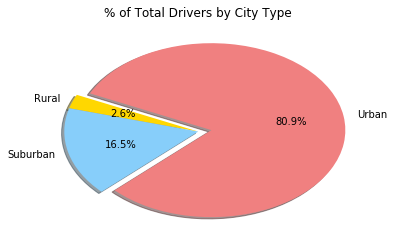

<Figure size 432x288 with 0 Axes>

In [50]:
# Calculate Driver Percents
type_driver_pct = dataset.loc[:,['city','type','driver_count']].drop_duplicates()
type_driver_pct = type_driver_pct.groupby('type').sum() 

# Build Pie Charts
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0,0,0.1]
plt.pie(type_driver_pct, labels=type_driver_pct.index, colors=colors, shadow=True, startangle=155, autopct="%1.1f%%",
        explode=explode)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.show()
plt.savefig("total_drivers_by_city_type.png")